In [1]:
# Import the typical ML utilities

%matplotlib inline
from utils import *
import pandas as pd # for raw dataset manipulation
import numpy as np # for fast matrix operations
import matplotlib.pyplot as plt # to plot and visualize

# sklearn models which we may use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet, Lars, Huber

from sklearn.preprocessing import normalize
from sklearn.grid_search import ParameterGrid
from sklearn import metrics

from datetime import datetime
import itertools

First, load our dataset and see what the data looks like. For this we will use pandas.

In [2]:
titanic_train_df, titanic_test_df = pd.read_csv('data/titanic_train.csv'), pd.read_csv('data/titanic_test.csv')

In [3]:
# randomly sort the data
titanic_train_df = titanic_train_df.sample(frac = 1)
titanic_train_df.reset_index(drop=True, inplace=True)


In [4]:
titanic_train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
1,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
2,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
3,376,1,1,"Meyer, Mrs. Edgar Joseph (Leila Saks)",female,NaN,1,0,PC 17604,82.1708,NaN,C
4,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
5,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S
6,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
7,722,0,3,"Jensen, Mr. Svend Lauritz",male,17.0,1,0,350048,7.0542,NaN,S
8,604,0,3,"Torber, Mr. Ernst William",male,44.0,0,0,364511,8.0500,NaN,S
9,238,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,C.A. 31921,26.2500,NaN,S


Pandas is really useful for data preprocessing. Here, we will use it to drop columns that are not useful to the task of survival prediction, as well as filling N/A columns with a -1. 

We will also transform categorical features, such as male and female, to binary ones with a mapping that pandas and python dicts let us do easily.

In [5]:
# select the "important" columns
# df.drop(df.columns[[0, 1, 3]], axis=1)
titanic_train_df.drop(titanic_train_df.columns[[0, 3, 6,7,8,10,11]], axis = 1, inplace=True)
titanic_train_df.fillna(-1, inplace = True)
# create a mapping for male and females
sex_dict = {'male': 0, 'female': 1, -1: -1}
# map the values to binary
titanic_train_df.Sex = titanic_train_df.Sex.apply(lambda x: sex_dict[x])


In [6]:
titanic_train_df

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,49.0,0.0000
1,0,1,0,45.0,83.4750
2,0,3,1,28.0,7.8958
3,1,1,1,-1.0,82.1708
4,1,3,0,19.0,8.0500
5,0,3,0,19.0,7.6500
6,0,3,0,19.0,7.8958
7,0,3,0,17.0,7.0542
8,0,3,0,44.0,8.0500
9,1,2,1,8.0,26.2500


Now we can plot a few of our variables and how they are distributed. It's always a good idea to do some sort of data visualiazation before attempting the use of any ML algorithms.

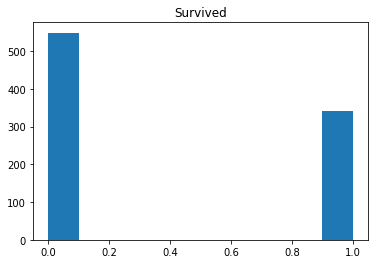

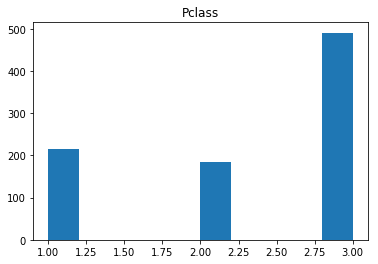

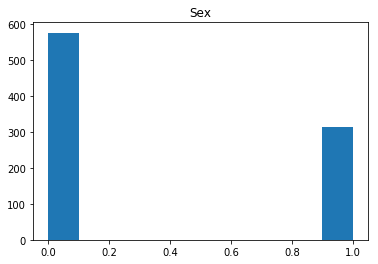

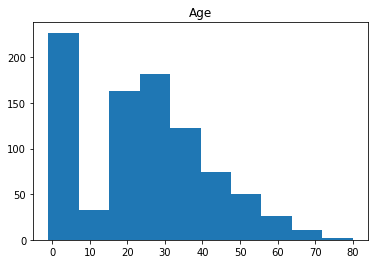

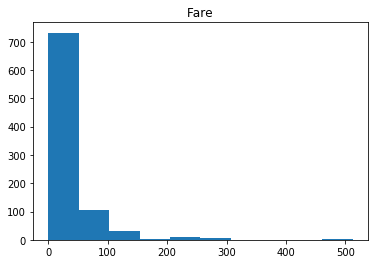

In [7]:
for f in titanic_train_df.columns:
    plt.hist(titanic_train_df[f])
    plt.title(f)
    plt.show()

In [8]:
titanic_train = titanic_train_df.as_matrix() # convert to numpy matrix

Next, it's essential to split the data into training and testing portions, so we can train our classifier on one and tehn see how well it did on unseen data. This is the main point of machine learning - doing well on unseen data (ability to generalize), rather than doing well on data we've already seen (if that was our goal, then getting 100% accuracy would be trivial if we just memorize the training data). We'd also like to normalize the data to have zero mean and unit variance so that some of our ML algorithms aren't dominated by a single feature, which may happen to have values much larger in magnitude than others, but actually contribute equal importance to the decision.

In [9]:
#titanic_train.shape
X, y = titanic_train[:, 1:], titanic_train[:, 0]
# normalize data
X = (X - np.mean(X))/np.std(X)

In [10]:
# split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

The sklearn library lets you easily train an off the shelf classifier and test in on datasets. Let's see how it works.

In [11]:
# basic ML classifier
dclf = DecisionTreeClassifier(criterion='entropy')
dclf.fit(X_train, y_train)
predictions = dclf.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_true = y_test, y_pred = predictions)
print acc

0.772388059701


If you look at the documentation for sklearn, you'll notice that it accepts many parameters upon instantiation of the decision tree. Many of these are actually hyperparemeters - constants associated with the model that are not set by the training data, but need to be tuned by the ML practicioner. The issue of hyperparameter selection is a difficult and important one in machine learning, and the quality of your hyperparameters can determine how good your overall model is. 

One common way to find the best hyperparameter combination is to do a grid search over all possible values, and select the best, according to a metric evaluated on a test dataset or using k-fold CV. 

In [12]:
# grid search: searching for several different hyperparameters, and seeing their accuracy on a test set
depths = [5, 10, 15, 20, 100]
accs = []
for d in depths:
    dclf = DecisionTreeClassifier(criterion='entropy', max_depth = d)
    dclf.fit(X_train, y_train)
    predictions = dclf.predict(X_test)
    acc = accuracy_score(y_true = y_test, y_pred = predictions)
    accs.append((d, acc))

accs.sort(key = lambda x: x[1])
accs[len(accs)-1]

# however, what we have done above is technically invalid since we've used the test dataset many times
# when we should really be touching it only once to get an idea of generalization

# its better to use cross validation for this



(5, 0.83955223880597019)

Let's explore the issue of overfitting. A classifier can sometimes be prone to overfitting, where essentially it "memorizes" the training dataset, or equivalently, begins to fit the noise in the training dataset instead of learning the general pattern. This causes the algorithm to fail to generalize well, as the underlying distribution of the data from which our training sample was drawn from does not have the same intricacies or noise that our training dample does. 

Preventing overfitting in machine learning is essential to good generalization. With many ML algorithms, this can be done with techniques such as regularization, early-termination (terminating your training once test accuacy begins to decrease), or feature selection. 

The general guidelines to prevent overfititng is to use k-fold CV to validate your models, reguarlize when possible (and explore the different regularization hyperparameters), select your features carefully based on which features would likely have the best generalization ability. Overall, keep your model as simple and using as little features as possible. 

using 1 split for validation
using 2 split for validation
using 3 split for validation
using 4 split for validation
using 5 split for validation
using 6 split for validation
using 7 split for validation
using 8 split for validation
using 9 split for validation
using 10 split for validation
using 1 split for validation
using 2 split for validation
using 3 split for validation
using 4 split for validation
using 5 split for validation
using 6 split for validation
using 7 split for validation
using 8 split for validation
using 9 split for validation
using 10 split for validation
using 1 split for validation
using 2 split for validation
using 3 split for validation
using 4 split for validation
using 5 split for validation
using 6 split for validation
using 7 split for validation
using 8 split for validation
using 9 split for validation
using 10 split for validation
using 1 split for validation
using 2 split for validation
using 3 split for validation
using 4 split for validation
using 5 spl

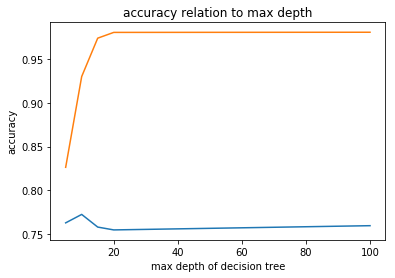

0.772388059701


In [13]:
depths = [5, 10, 15, 20, 100]
accs = []
for d in depths:
    dclf = DecisionTreeClassifier(criterion='entropy', max_depth = d)
    mean_train_error, mean_test_error = cross_validate(dclf, X_train, y_train, k = 10)
    accs.append((d, 1-mean_test_error, 1-mean_train_error))

# a plot of overfitting: accuracy on the training dataset increases, but decreases on the test dataset with larger depth of the decision tree.
plt.plot(list(accs[i][0] for i in range(len(accs))), list(accs[i][1] for i in range(len(accs))))
plt.plot(list(accs[i][0] for i in range(len(accs))), list(accs[i][2] for i in range(len(accs))))
plt.ylabel("accuracy")
plt.xlabel("max depth of decision tree")
plt.title("accuracy relation to max depth")
plt.show()
accs.sort(key = lambda x: x[1])
best = accs[len(accs)-1]
depth = best[0]
# now evaluate it on the test set
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth)
clf.fit(X_train, y_train)
test_preds = clf.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred = test_preds)
print acc


In [ ]:
from sklearn.svm import SVC
# in-depth hyperparameter search using SVM
C = [0.01, 0.1, 0.5, 1.0, 5.0, 10, 50, 100, 1000]
gamma = [0.1, 0.5, 0.9, 1.0, 10, 50, 100]
kernel = ['linear', 'poly', 'rbf']
accs = []
best = (np.inf, None, None, None)
for c in C:
    for g in gamma:
        for k in kernel:
            svm = SVC(C = c, gamma = g, kernel = k)
            svm.fit(X_train, y_train)
            acc = accuracy_score(y_true = y_test, y_pred = svm.predict(X_test))
            print "done validating svm with c, g, k: {} {} {}".format(c, g, k)
            if acc < best[0]:
                best = (acc, c, g, k)
print best


done validating svm with c, g, k: 0.01 0.1 linear
done validating svm with c, g, k: 0.01 0.1 poly
done validating svm with c, g, k: 0.01 0.1 rbf
done validating svm with c, g, k: 0.01 0.5 linear
done validating svm with c, g, k: 0.01 0.5 poly
done validating svm with c, g, k: 0.01 0.5 rbf
done validating svm with c, g, k: 0.01 0.9 linear
done validating svm with c, g, k: 0.01 0.9 poly
done validating svm with c, g, k: 0.01 0.9 rbf
done validating svm with c, g, k: 0.01 1.0 linear
done validating svm with c, g, k: 0.01 1.0 poly
done validating svm with c, g, k: 0.01 1.0 rbf
done validating svm with c, g, k: 0.01 10 linear
done validating svm with c, g, k: 0.01 10 poly
done validating svm with c, g, k: 0.01 10 rbf
done validating svm with c, g, k: 0.01 50 linear
